In [19]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [33]:
sys = signal.TransferFunction([1], [1, -0.9], dt=0.1)
w, H = signal.dfreqresp(sys)
print(H)

[10.        +0.00000000e+00j  9.99990624-3.14156470e-02j
  9.99962497-6.28296166e-02j ... -0.52631578-2.61074201e-04j
 -0.52631579-1.74049460e-04j -0.52631579-8.70247280e-05j]


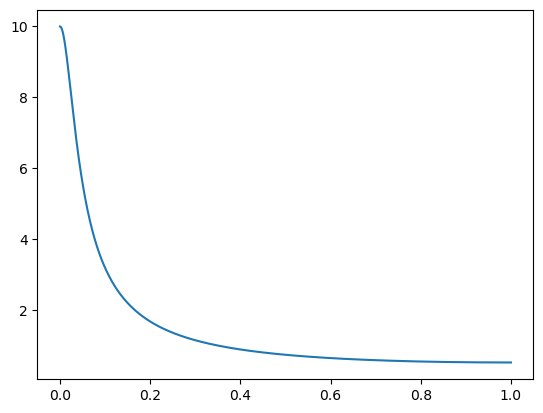

In [30]:
plt.plot(w/max(w), abs(H))
plt.show()

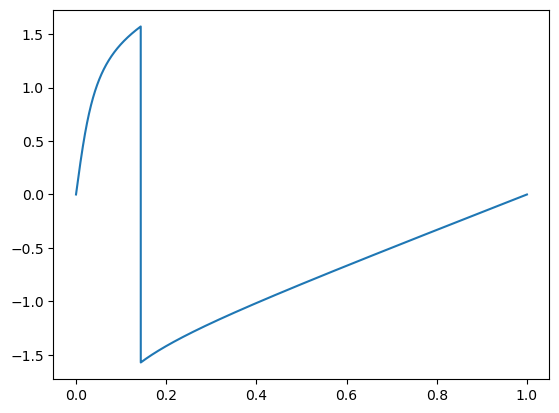

In [40]:
theta = -np.arctan(H.imag/H.real)
plt.plot(w/max(w), theta)
plt.show()

In [73]:
class A:
    def __init__(self, name):
        self.name = name
        
    def __len__(self):
        return 8
    
    def __str__(self):
        return "String"
    
    def fun(self):
        print('Parent Class')
    

In [74]:
ob = A('k')

len(ob)
str(ob)

'String'

In [75]:
class B(A):
    def fun(self):
        print('Base class')

In [76]:
B_obj = B('R')
B_obj.name

B_obj.fun()
ob.fun()

Base class
Parent Class


In [19]:
class A:
    def __repr__(self):
        return "Representation"
    
    def __str__(self):
        return "String"
    
a = A()
a

Representation

In [15]:
print(a)

String


In [16]:
print(A())

String


In [25]:
k = "Hi how are you?"
print(k[::-1])
print(k[1:6])

?uoy era woh iH
i how


In [35]:
import numpy as np

In [120]:
A = [1, 1, 1]
B = [1, 2, 3]

c = []
for i in range(len(A)):
    for j in range(len(B)):
        c.append(A[i]*B[j])
        
print(c)

[1, 2, 3, 1, 2, 3, 1, 2, 3]


In [121]:
col = np.array_split(c, len(A))
print(col)

col_list = []
for i in range(len(col)):
    col_list.append(list(col[i]))
    
print(col_list)

[array([1, 2, 3]), array([1, 2, 3]), array([1, 2, 3])]
[[1, 2, 3], [1, 2, 3], [1, 2, 3]]


In [122]:
length = len(A)+len(B)-1
print(length)
pad_zero = length-len(A)
print(pad_zero)

5
2


In [123]:
appended = []
for i in range(len(col_list)):
    for u in range(i):
        appended.append(0)
    for j in range(len(col_list[i])):
        appended.append(col_list[i][j])
    for l in range(pad_zero-i):
        appended.append(0)

print(appended)

[1, 2, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 1, 2, 3]


In [124]:
final_list = np.array_split(appended, len(A))

zero_padded = []
for i in range(len(final_list)):
    zero_padded.append(list(final_list[i]))
    
print(zero_padded)

[[1, 2, 3, 0, 0], [0, 1, 2, 3, 0], [0, 0, 1, 2, 3]]


In [125]:
convolved = []

for i in range(length):
    summ = 0
    for j in range(len(A)):
        summ = summ + zero_padded[j][i]
        #print(zero_padded[j][i], summ)
        
    #print('\n')
    convolved.append(summ)
    
print(convolved)

[1, 3, 6, 5, 3]


# Convolution 1D

In [3]:
import numpy as np

In [44]:
def inbuiltconvolution(x, h):
    y = np.convolve(x, h)
    return y

In [45]:
def myconvolution(x, h):
    temp = []
    for i in range(len(x)):

        for m in range(i):
            temp.append(0)

        for j in range(len(h)):
            temp.append(x[i]*h[j])

        for k in range(len(x)-i-1):
            temp.append(0)

    ys = list(np.array_split(temp, len(x)))

    y = []
    val = 0
    for i in range(len(x)+len(h)-1):
        for j in range(len(x)):
            val = val + ys[j][i]
        y.append(val)
        val = 0

    return y

In [56]:
x = [1, -1, 1, 1, 1]
h = [1, 1, 1, 8, 27, 8, 19, 26]
print(myconvolution(x, h))
print(inbuiltconvolution(x, h))

[1, 0, 1, 9, 22, -9, 47, 50, 28, 53, 45, 26]
[ 1  0  1  9 22 -9 47 50 28 53 45 26]


## Method 2: by formula?